In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import _stochastic_gradient
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
df = pd.read_csv('dataset/Food_Delivery_Times.csv')
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [3]:
cat_cols = ['Weather','Traffic_Level','Time_of_Day','Vehicle_Type']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
#df.head()
df.dropna()
df = df.drop(columns=['Order_ID'])
avg = df['Courier_Experience_yrs'].mean()
df['Courier_Experience_yrs'].fillna(avg, inplace=True)

C:\Users\Maharshi\AppData\Local\Temp\ipykernel_16168\2646193310.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Courier_Experience_yrs'].fillna(avg, inplace=True)


In [4]:
X = df.drop(columns=['Delivery_Time_min'])
y = df['Delivery_Time_min']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [6]:
model = _stochastic_gradient.SGDRegressor()

In [7]:
model.fit(X_train, y_train)

SGDRegressor()

In [10]:
def getmetric(model):
    print("Train R^2:", model.score(X_train, y_train))
    print("Test R^2:", model.score(X_test, y_test))
    y_pred = model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(f'Mean square error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Square Error: {rmse}')
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred, label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, label='Ideal Fit')
    plt.xlabel('Actual Time')
    plt.ylabel('Predicted Time')
    plt.title('Predicted vs Actual Delivery Times')
    plt.legend()
    plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'alpha': uniform(0.0001, 0.1),
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': uniform(0.001, 0.1),
    'penalty': ['l2', 'l1', 'elasticnet']
}

In [12]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best params:", random_search.best_params_)
print("Best score:", -random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best params: {'alpha': 0.08297375091519295, 'eta0': 0.03667533266935893, 'learning_rate': 'adaptive', 'penalty': 'l2'}
Best score: 123.70355006411977


Train R^2: -118.32382641866354
Test R^2: -108.45031638853594
Mean square error: 108.45031638853594
Mean Absolute Error: 7.106167227561619
Root Mean Square Error: 10.41394816525106


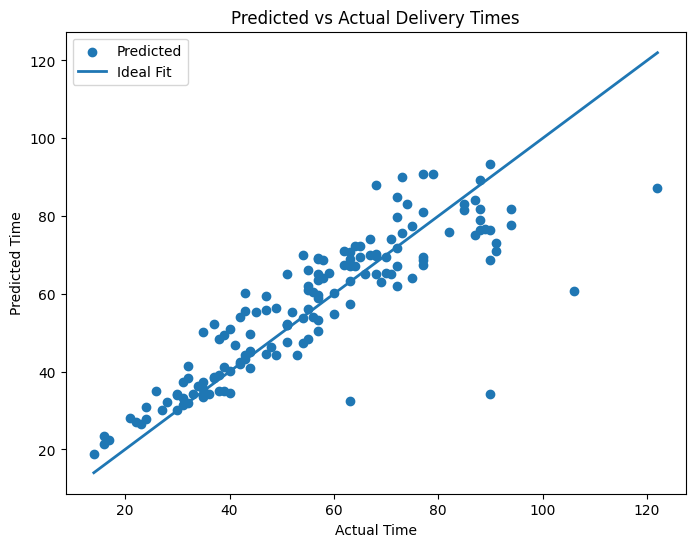

In [13]:
getmetric(random_search)